# BigMart Sales Prediction

### Problem Statement
#### The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

### Statement Analysis
####  Supervised Machine Learning Problem
####  The Target Value is **Sales**

### Goal
#### Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


# Hypothesis Generation Using Product, Store and City
1. **City Type:** Stores located in urban should have higher Sales.
2. **Store Location:** Store located in popular market place shoud have higher Sales
3. **Populted City:** City with high population should have higher Sales.
4. **Store Size**: Stores with large size should have higher Sales.
5. **Staff**: Stores with more staff should have higher Sales.
6. **Branded Products**: Branded Products will have higher Sales. 
7. **Product Visbility**: Products with large space should have higher Sales.
8. **Product Frequency**: More frequnct products will have high Sales.
9. **Utilities**: Daily Basic Products should have higher Sales.
10. **Promotional Offers**: Promo Products should have higher Sales.

This dataset is named BigMart Sales. The dataset contains a set of 8,523 records under 12 attributes:

Column Name and their                          Description
* **Item_Identifier:**                Unique product ID
* **Item_Weight	:**                    Weight of product
* **Item_Fat_Content	:**   Checks the Concentration of fat in the product
* **Item_Visibility	:**   The % of total display area of all similar products in a store
* **Item_Type:**    Category
* **Item_MRP	 :**          Maximum Retail Price for a Product
* **Outlet_Identifier	:**   Store ID
* **Outlet_Establishment_Year	:**The year in which store was established
* **Outlet_Size	:**The size of the store (Area Size Category)
* **Outlet_Location_Type	:**In Terms of city Tiers (Size)
* **Outlet_Type	:**Grocery store or a type of supermarket
* **Item_Outlet_Sales	:** Sales of the product In the Specific outlet

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.


/kaggle/input/bigmart-sales-data/Train.csv
/kaggle/input/bigmart-sales-data/Test.csv


In [2]:
#path for the training set
train_path = "/kaggle/input/bigmart-sales-data/Train.csv"
#path for the testing set
test_path = "/kaggle/input/bigmart-sales-data/Test.csv"

In [3]:
# Reading Dataset Train.csv
train_df = pd.read_csv(train_path)
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# Reading Dataset Test.csv
test_df = pd.read_csv(test_path)
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
# Rows and columns
print(f'Training Dataset (row, col): {train_df.shape} \n\nTesting Dataset (row, col): {test_df.shape}')

Training Dataset (row, col): (8523, 12) 

Testing Dataset (row, col): (5681, 11)


# Preprocessing

## Lets Combine Both DataSets since both are Similiar    

In [6]:
# Lets combine both datasets
test_df['Item_Outlet_Sales'] = np.nan
combined = pd.concat([train_df, test_df])

In [7]:
combined.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [8]:
# Summary of Dataset Train
combined.describe(include=[object, np.number])

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,14204,11765.000000,14204,14204.000000,14204,14204.000000,14204,14204.000000,10188,14204,14204,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDU15,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,8485,NaN,2013,NaN,1559,NaN,4655,5583,9294,NaN
mean,NaN,12.792854,NaN,0.065953,NaN,141.004977,NaN,1997.830681,NaN,NaN,NaN,2181.288914
std,NaN,4.652502,NaN,0.051459,NaN,62.086938,NaN,8.371664,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.710000,NaN,0.027036,NaN,94.012000,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.054021,NaN,142.247000,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.750000,NaN,0.094037,NaN,185.855600,NaN,2004.000000,NaN,NaN,NaN,3101.296400


 # 

In [9]:
# Lets check missing Values
print('Train:\n')
print('Missing Values by Count: \n\n',
      combined.isnull().sum().sort_values(ascending=False),'\n\nMissing Values by %:\n\n',
      combined.isnull().sum().sort_values(ascending=False)/train_df.shape[0] * 100)


Train:

Missing Values by Count: 

 Item_Outlet_Sales            5681
Outlet_Size                  4016
Item_Weight                  2439
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64 

Missing Values by %:

 Item_Outlet_Sales            66.654934
Outlet_Size                  47.119559
Item_Weight                  28.616684
Item_Identifier               0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64


In [10]:
# Lets check and imputate missing values
print('Missing Values in Outlet_Size :\n\n',combined.Outlet_Size.value_counts())
print('Missing Values in Item_Weight :\n\n',combined.Item_Weight.value_counts())

Missing Values in Outlet_Size :

 Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
Missing Values in Item_Weight :

 17.600    135
12.150    127
10.500    123
13.650    115
11.800    113
         ... 
7.640       7
5.905       7
7.850       6
4.615       6
9.035       6
Name: Item_Weight, Length: 415, dtype: int64


**OutLet_Size** is a catogerial column, we can use mode to fill the values.

In [11]:
# Filling Outlet Size  missing values.
combined['Outlet_Size'] = combined.Outlet_Size.fillna(combined.Outlet_Size.dropna().mode()[0])
# Checking if we filled all values
print( 'Missing values after filling:' ,combined.Outlet_Size.isnull().sum())

Missing values after filling: 0


**Item_wieght** is a mumeric column, we need to visulize the its values/distribution to see clearly.

Text(0.5, 1.0, 'Item Wieght Distribution')

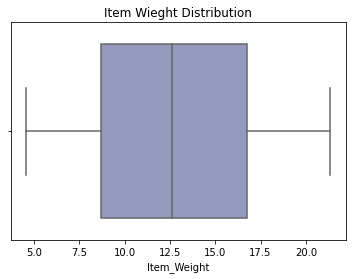

In [12]:
# sns.boxplot(data=combined['Item_Weight'],orient='v', color='c')
sns.boxplot(x=combined['Item_Weight'], palette='BuPu')
plt.title('Item Wieght Distribution')



No **Outliers** in Item_wieght, So we can replace missing values with its mean

In [13]:
# imputate missing values in item 
combined['Item_Weight'] = combined.Item_Weight.fillna(combined.Item_Weight.dropna().mean())
print('Missing values after filling: ', combined.Item_Weight.isnull().sum())

Missing values after filling:  0


In [14]:
# check info for missing values
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB
